In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [13]:
from google.colab import files
uploaded = files.upload()

import io
data = pd.read_csv(io.BytesIO(uploaded['creditcard.csv']))

Saving creditcard.csv to creditcard (4).csv


In [0]:
#viz of confusion matrix
def plot_confusion_matrix(cm, classes, normalize = False, title = 'Confusion matrix"', cmap = plt.cm.Blues) :
    plt.figure()
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 0)
    plt.yticks(tick_marks, classes)
 
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])) :
        plt.text(j, i, cm[i, j],
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')
 
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [0]:
#evaluate model performance
def show_metrics():
    tp = cm[1,1]
    fn = cm[1,0]
    fp = cm[0,1]
    tn = cm[0,0]
    print('precision: {:.3f}'.format(tp/(tp+fp)))
    print('recall: {:.3f}'.format(tp/(tp+fn)))
    print('F1 score: {:.3f}'.format(2*(((tp/(tp+fp))*(tp/(tp+fn)))/((tp/(tp+fp))+(tp/(tp+fn))))))

In [0]:
#precision-recall curve
def plot_precision_recall():
    plt.step(recall, precision, color = 'b', alpha = 0.2, where = 'post')
    plt.fill_between(recall, precision, step ='post', alpha = 0.2, color = 'b')
    plt.plot(recall, precision, linewidth=2)
    plt.xlim([0.0,1])
    plt.ylim([0.0,1.05])
    plt.xlabel('precision')
    plt.ylabel('precision')
    plt.title('precision - recall curve')
    plt.show();

In [17]:
print(data.describe())

                Time            V1  ...         Amount          Class
count  284807.000000  2.848070e+05  ...  284807.000000  284807.000000
mean    94813.859575  3.919560e-15  ...      88.349619       0.001727
std     47488.145955  1.958696e+00  ...     250.120109       0.041527
min         0.000000 -5.640751e+01  ...       0.000000       0.000000
25%     54201.500000 -9.203734e-01  ...       5.600000       0.000000
50%     84692.000000  1.810880e-02  ...      22.000000       0.000000
75%    139320.500000  1.315642e+00  ...      77.165000       0.000000
max    172792.000000  2.454930e+00  ...   25691.160000       1.000000

[8 rows x 31 columns]


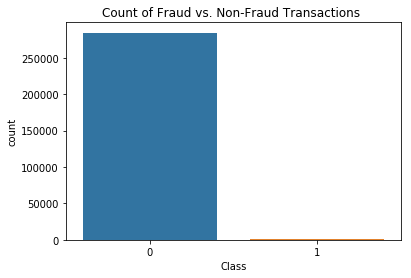

In [20]:
plt.figure()
ax = sns.countplot(x = 'Class', data = data)
plt.title('Count of Fraud vs. Non-Fraud Transactions ')
plt.show()

total amount of transaction:  284807
amount of non-fraud： 492
amount of fraud：0.001727


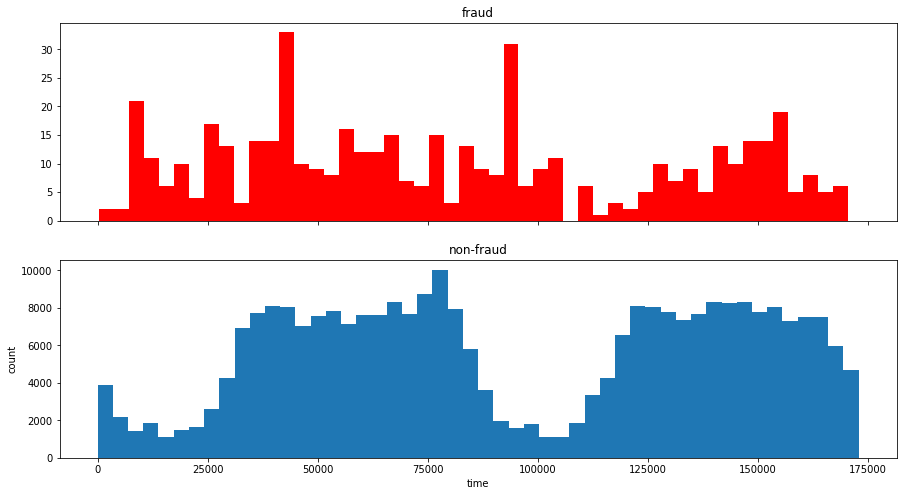

In [23]:
num = len(data)
num_fraud = len(data[data['Class']==1]) 
print('total amount of transaction: ', num)
print('amount of non-fraud：', num_fraud)
print('amount of fraud：{:.6f}'.format(num_fraud/num))

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(15,8))
bins = 50
ax1.hist(data.Time[data.Class == 1], bins = bins,color='red')
ax1.set_title('fraud')
ax2.hist(data.Time[data.Class == 0], bins = bins)
ax2.set_title('non-fraud')
plt.xlabel('time')
plt.ylabel('count')
plt.show()

In [0]:
data['Amount_Norm'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))

In [0]:
y = np.array(data.Class.tolist())
data = data.drop(['Time','Amount','Class'],axis=1)
X = np.array(data.as_matrix())

In [0]:
#train-test split
train_x, test_x, train_y, test_y = train_test_split (X, y, test_size = 0.1, random_state = 33)

In [0]:
clf = LogisticRegression()
clf.fit(train_x, train_y)
predict_y = clf.predict(test_x)

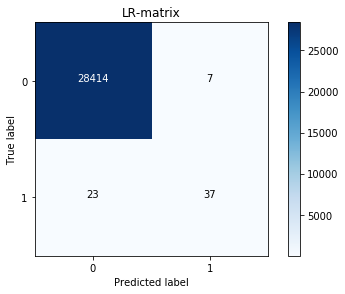

precision: 0.841
recall: 0.617
F1 score: 0.712


In [28]:
score_y = clf.decision_function(test_x)  
cm = confusion_matrix(test_y, predict_y)
class_names = [0,1]
plot_confusion_matrix(cm, classes = class_names, title = 'LR-matrix')
show_metrics()

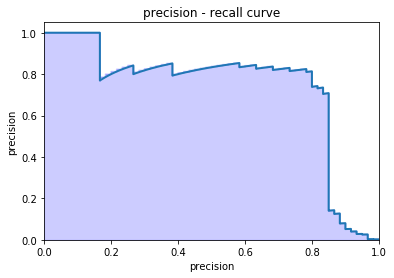

In [29]:
precision, recall, thresholds = precision_recall_curve(test_y, score_y)
plot_precision_recall()

**Conclusion**

**Precision** evaluates how sure our model in detecting fraud transactions as **recall** shows how many  fraud cases our model is able to detect. In general, the more precise our model is, the less cases it will be able to detect. For heavily imbalanced distribution like this, we would love to take a look at **F1-score** as a measure of precision-recall tradeoff.Precision evaluates how sure our model in detecting fraud transactions as recall shows how many  fraud cases our model is able to detect. In general, the more precise our model is, the less cases it will be able to detect. For heavily imbalanced distribution like this, we would love to take a look at F1-score as a measure of precision-recall tradeoff.
It seems like that recell score is the metric that could help us catch the most fraud transactions, however, if we predict a fraud which turns out not to be, is not a massive problem compared to the opposite for company’s side, it might hurt some innocent customers’ feelings.

